# GROUP 1
# AI Assignment 2

| STUDENT NAME            | STUDENT REGISTRATION NUMBER |
|-------------------------|-----------------------------|
| 1. Tonderai Murambidzi  | R221699H                    |
| 2. Stanley Mashegede    | R222057Q                    |
| 3. Blessing Tsenesa     | R212381Z                    |
| 4. Pedesta T Ushe       | R223541F                    |
| 5. Gift Marimo          | R213699J                    |
| 6. Evelyn Shamiso Musabaike | R222339V              |
| 7. Moleen Chinhoyi      | R219504X                    |
| 8. Tinashe E Amtero     | R223150X                    |
| 9. George T Chikwira    | R222979M                    |
| 10. Wanda Nyasha        | R221593P                    |



# Question

Choose a real-world application that can benefit from neural networks or deep learning techniques. Develop and train a neural network model to solve the problem. Explain the architecture and layers of your neural network, the activation functions used and the training process. Evaluate the performance of your model, including accuracy and any trade-offs made during the design. Discuss the potential impact of your solution on the chosen application domain.

Long Short-Term Memory (LSTM) networks are widely recognized for their effectiveness in handling sequential or time-series data. Their architecture, specifically designed to understand context over time, makes them particularly suited for tasks involving text and speech data, among others. The LSTM's ability to capture long-term dependencies is pivotal in understanding the context in text data, where the relationship between words can span several tokens, carrying significant semantic load. This is especially valuable in applications like text classification or natural language processing (NLP) tasks, such as spam detection, where LSTM-based networks can automate and streamline the process of filtering out unwanted messages or identifying important patterns in text data. Such applications can enhance user experiences, improve productivity by reducing manual sorting efforts, and bolster security by effectively identifying malicious content (Lindemann et al., 2021); (Fischer & Krauss, 2017).

The Embedding layer in LSTM networks plays a critical role in text processing applications. It maps each word to a vector of a specified size, allowing the model to interpret words not just as discrete atomic symbols, but as meaningful representations with understandable relationships between words. This process is vital for the model to capture the nuances of language. The LSTM layer, typically with 100 units, complements this by capturing temporal features. Coupled with dropout mechanisms to prevent overfitting, these layers collectively contribute to the model's ability to accurately process and classify text sequences. LSTM networks trained with optimizers like Adam, using loss functions suitable for the task at hand (such as 'binary_crossentropy' for binary classification), have shown considerable effectiveness in various domains. This effectiveness is enhanced by the Embedding layer's ability to create rich, contextual representations of text (Khrulkov et al., 2019); (Palangi et al., 2015).

- Lindemann, B., Müller, T., Vietz, H., Jazdi, N., & Weyrich, M. (2021). A survey on long short-term memory networks for time series prediction. *Procedia CIRP*, 99, 650-655. [Lindemann et al., 2021]

- Fischer, T. G., & Krauss, C. (2017). Deep learning with long short-term memory networks for financial market predictions. *Eur. J. Oper. Res.*, 270(2), 654-669. [Fischer & Krauss, 2017]

- Khrulkov, V., Hrinchuk, O., Mirvakhabova, L., & Oseledets, I. (2019). Tensorized Embedding Layers for Efficient Model Compression. *ArXiv*, abs/1901.10787. [Khrulkov et al., 2019]

- Palangi, H., Deng, L., Shen, Y., Gao, J., He, X., Chen, J., Song, X., & Ward, R. (2015). Deep Sentence Embedding Using Long Short-Term Memory Networks: Analysis and Application to Information Retrieval. *IEEE/ACM Transactions on Audio, Speech, and Language Processing*, 24(4), 694-707. [Palangi et al., 2015]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense


In [2]:
# Loading  dataset

dataset = pd.read_csv("spam_dataset.csv")

## Exploratory Data Analysis

In [3]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
dataset.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
dataset.shape

(5171, 4)

In [6]:
dataset.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


# Data Cleaning on text column

In [7]:
#pip install nltk

In [8]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [9]:
# Function to clean the text data
def clean_text(text):
    text = text.lower()  # Lowercase conversion
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra white spaces
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Optionally, remove stopwords
    return ' '.join(tokens)  # Join the tokens back into a string

# List of English stopwords
stop_words = set(stopwords.words('english'))

# Apply the cleaning function to the text column
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

# Let's check the first few rows of the cleaned dataset
dataset[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter follow note gave ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january see attached file hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...
4,Subject: re : indian springs\r\nthis deal is t...,subject indian springs deal book teco pvr reve...


## Data Visualisation 

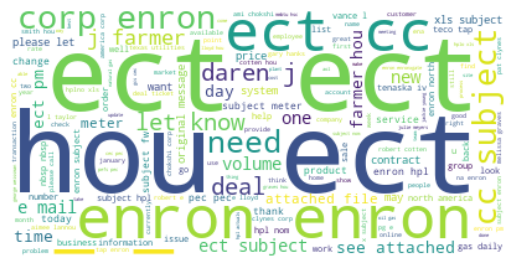

In [10]:

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(' '.join(dataset['cleaned_text']))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


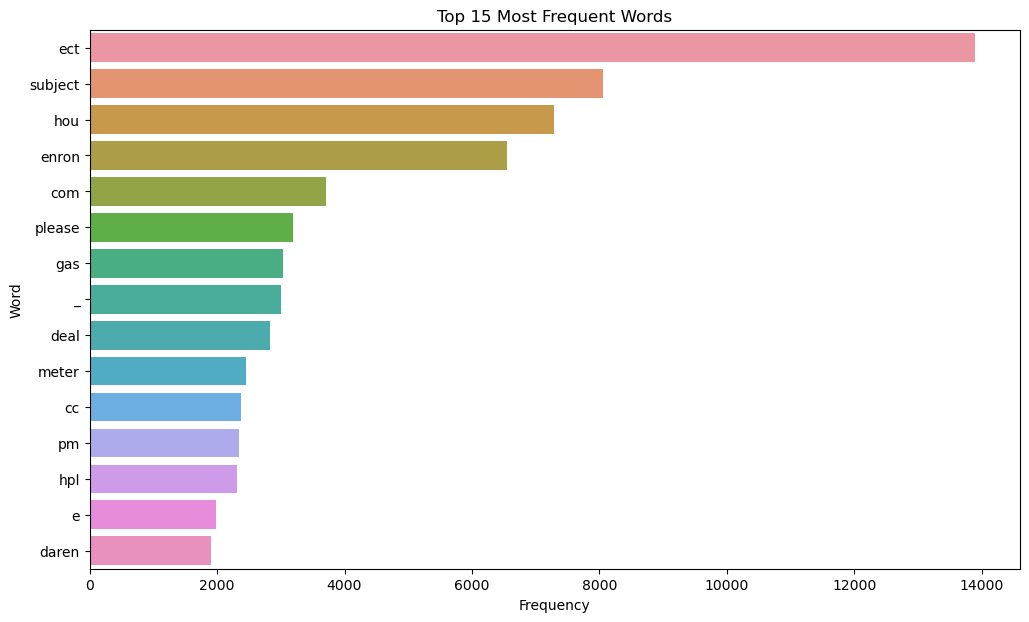

In [11]:
# Count the frequency of the words in cleaned text
all_words = ' '.join(dataset['cleaned_text']).split()
freq_dist = Counter(all_words)

# Convert to DataFrame for easy plotting
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the frequency distribution of the first 15 words
plt.figure(figsize=(12, 7))
sns.barplot(data=freq_df.head(15), x='Frequency', y='Word')
plt.title('Top 15 Most Frequent Words')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


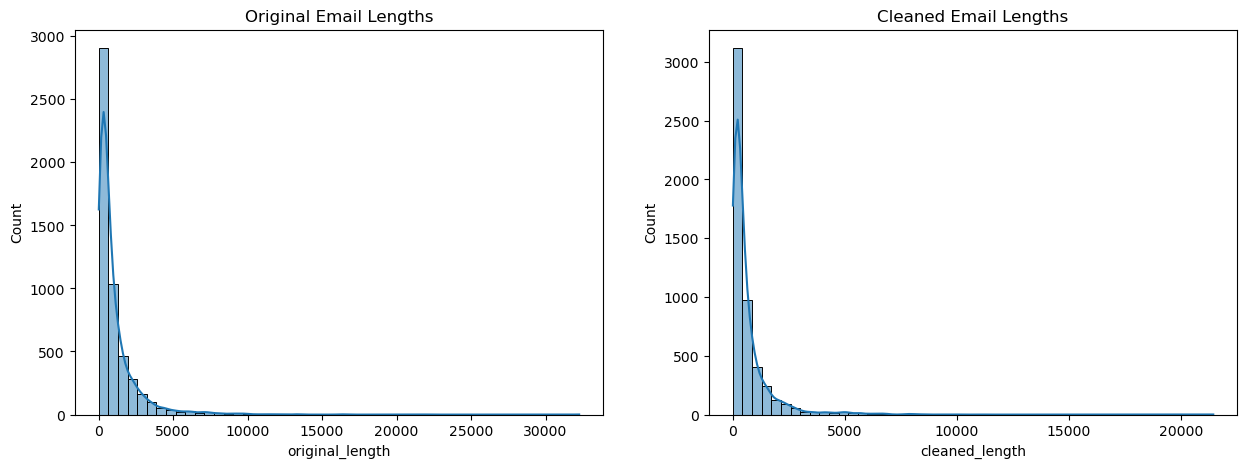

In [12]:
# Calculate the length of emails before and after cleaning
dataset['original_length'] = dataset['text'].apply(len)
dataset['cleaned_length'] = dataset['cleaned_text'].apply(len)

# Plot a histogram of the email lengths
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(dataset['original_length'], bins=50, kde=True)
plt.title('Original Email Lengths')
plt.subplot(1, 2, 2)
sns.histplot(dataset['cleaned_length'], bins=50, kde=True)
plt.title('Cleaned Email Lengths')
plt.show()

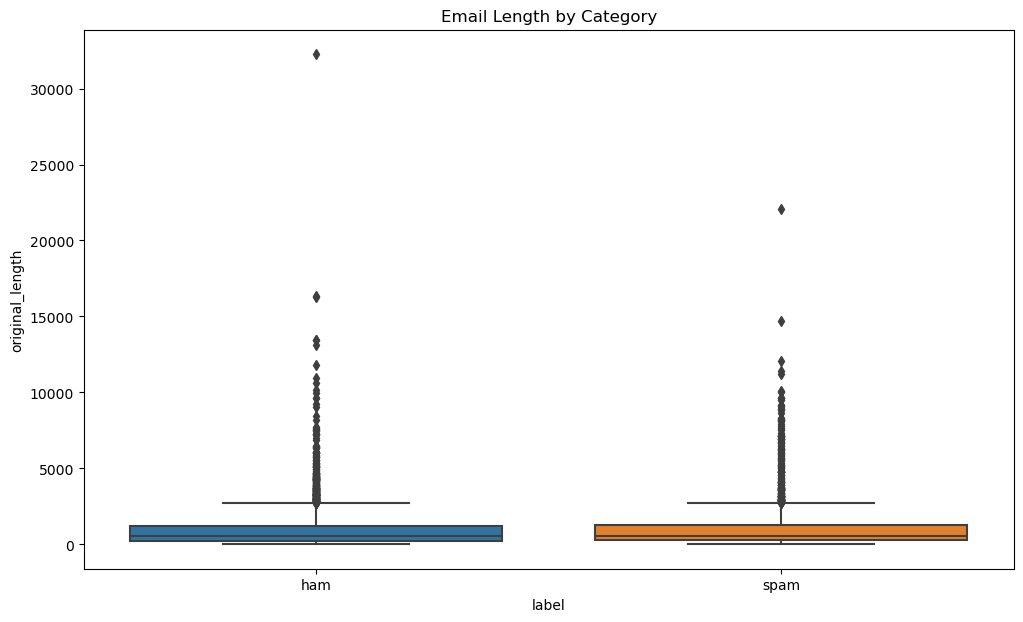

In [13]:
# Plot a boxplot of the email lengths by category
plt.figure(figsize=(12, 7))
sns.boxplot(x=dataset['label'], y=dataset['original_length'])
plt.title('Email Length by Category')
plt.show()


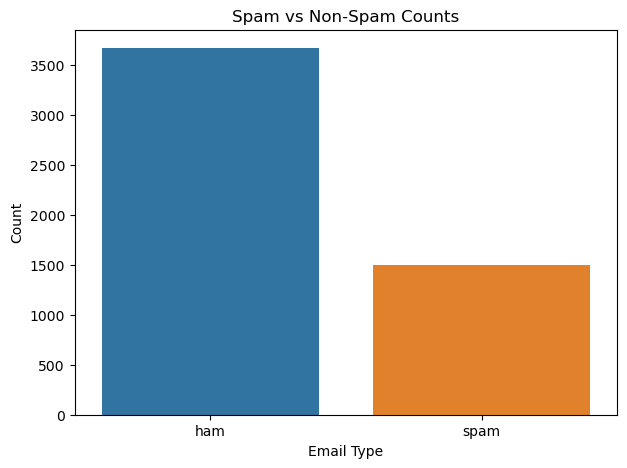

In [14]:
# Count the number of spam vs non-spam emails
label_counts = dataset['label'].value_counts()

# Plot a bar plot of spam vs non-spam counts
plt.figure(figsize=(7, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Spam vs Non-Spam Counts')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


In [15]:
dataset

,Unnamed: 0,label,text,label_num,cleaned_text,original_length,cleaned_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...,327,217
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january see attached file hpln...,97,63
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...,2524,1397
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,414,394
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian springs deal book teco pvr reve...,336,191
...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put ft transport volumes decreased con...,534,221
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject following noms hpl take extra mmcf wee...,1114,545
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie men...,402,269
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets august activity ...,573,372


# Data Preprocessing and Tokenization

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum number of words to consider in the tokenizer
MAX_NB_WORDS = 50000

# Define the maximum number of words in each complaint
MAX_SEQUENCE_LENGTH = 250

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(dataset['cleaned_text'])

# Tokenize the text into sequences
sequences = tokenizer.texts_to_sequences(dataset['cleaned_text'])

# Pad the sequences to ensure uniform length
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Define the target variable (labels)
labels = dataset['label_num']


In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Model Architecture ( LSTM)

In [18]:

MAX_NB_WORDS = 1000  # Maximum number of words
MAX_SEQUENCE_LENGTH = 250  # Maximum length of input sequences
embedding_dim = 100  # Dimension of the embedding layer
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_dim))  # Remove input_length here
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




## Training 

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 492ms/step - accuracy: 0.7037 - loss: 0.5669 - val_accuracy: 0.9111 - val_loss: 0.2228
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.9315 - loss: 0.2073 - val_accuracy: 0.9652 - val_loss: 0.1221
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9495 - loss: 0.1443 - val_accuracy: 0.9691 - val_loss: 0.0967
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 500ms/step - accuracy: 0.9743 - loss: 0.0951 - val_accuracy: 0.9700 - val_loss: 0.0880
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 494ms/step - accuracy: 0.9732 - loss: 0.0835 - val_accuracy: 0.9720 - val_loss: 0.0810
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - accuracy: 0.9781 - loss: 0.0702 - val_accuracy: 0.9768 - val_loss: 0.0707
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.9788 - loss: 0.0684 - val_accuracy: 0.9739 - val_loss: 0.0751
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.9842 - loss: 0.0554 - val_accu

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 250, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,505 (2.07 MB)

 Trainable params: 180,501 (705.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 361,004 (1.38 MB)

## Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Accuracy: 0.9710144927536232
Precision: 0.933993399339934
Recall: 0.9658703071672355
F1 Score: 0.9496644295302014


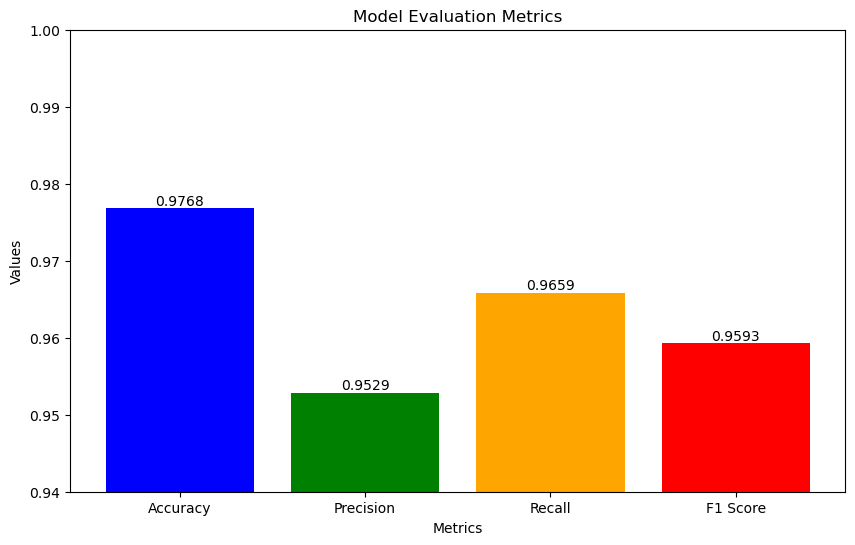

In [22]:
import matplotlib.pyplot as plt

# Define the evaluation metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9768115942028985, 0.9528619528619529, 0.9658703071672355, 0.9593220338983051]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')

# Add text labels for each bar
for i in range(len(metrics)):
    plt.text(i, values[i], str(round(values[i], 4)), ha='center', va='bottom')

# Show the plot
plt.ylim(0.94, 1.0)  # Set y-axis limits for better visualization
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


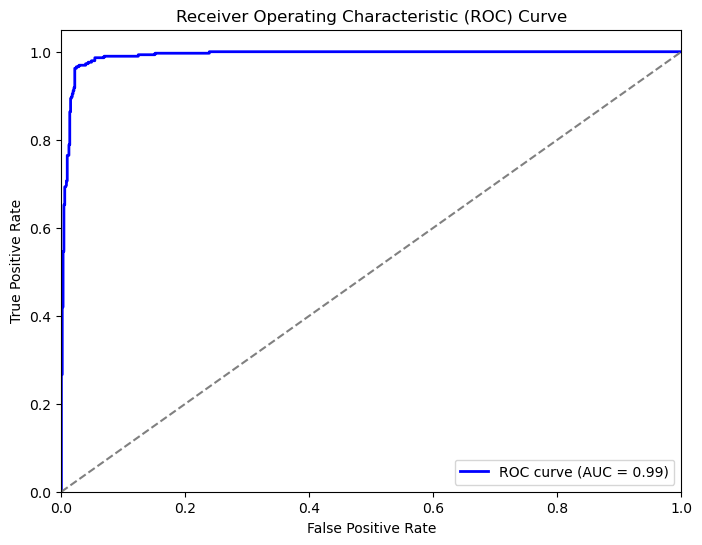

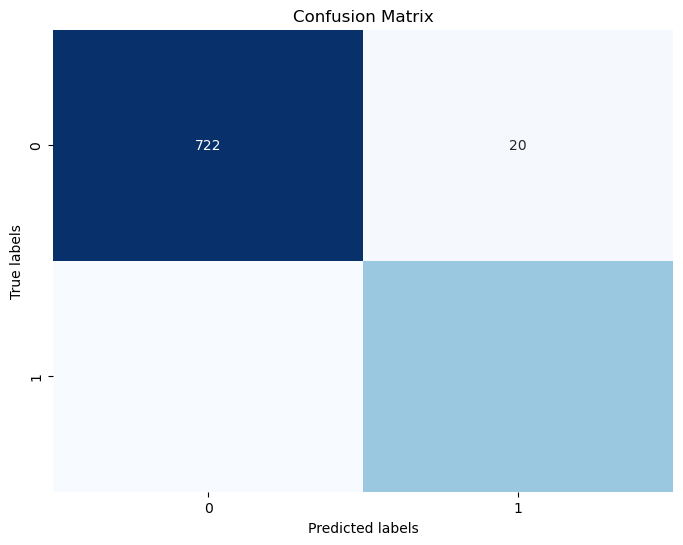

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Save the model to a file
model.save("model.h5")


In [25]:
from keras.models import load_model

# Load the model from the file
loaded_model = load_model("model.h5")
